###Personal Finance with AI based insights
###By Gargee Meshram

# Introduction
This notebook presents the design and development approach for a Personal Finance Management App, which aims to categorize expenditures, project future costs, and provide customized financial recommendations using AI.

## Objectives
- **Spending Categorization**: Automatically classify user transactions.
- **Expense Prediction**: Forecast upcoming expenses based on past data.
- **Personalized Financial Guidance**: Offer tailored advice to help users manage finances.

### 1. Problem Breakdown

#### Key Goals
- Classify transactions based on descriptions.
- Use historical data to predict future expenses.
- Generate actionable advice by analyzing spending patterns.

#### Challenges
- Protecting user data with robust security measures.
- Implementing secure API connections to retrieve transaction data from banks.
- Offering easily understandable and implementable financial advice.

### 2. Database Design

#### Schema Overview
A relational database will store data on users, their transactions, and categorized spending patterns.

#### Table Structure

- **Users Table**
  - `user_id`: Primary Key
  - `email`: User’s email, unique to each account
  - `password_hash`: Password stored securely as a hash
  - `created_at`: Date and time of account creation

- **Transactions Table**
  - `transaction_id`: Primary Key
  - `user_id`: References the Users table
  - `description`: Details about the transaction
  - `amount`: Transaction amount
  - `category`: Assigned category (optional)
  - `date`: Date of the transaction

- **Spending Categories Table**
  - `category_id`: Primary Key
  - `category_name`: Name of the spending category

- **Advice Table**
  - `advice_id`: Primary Key
  - `user_id`: References the Users table
  - `advice_text`: Personalized advice content
  - `created_at`: Timestamp indicating when the advice was generated

## System Design and Architecture

### Architecture Overview

#### Frontend
The app’s frontend will provide an intuitive web or mobile interface where users can enter transactions and access insights.

- **Technology Stack**:
  - Web Interface: React
  - Mobile Interface: React Native or Flutter
- **User Experience**: Designed to be straightforward, allowing users to quickly input data and view insights.

#### Backend
The backend will be built as a RESTful API using frameworks like Flask or Django in Python or Express.js in Node.js.

- **Endpoints**:
  - `POST /transactions`: Add a new transaction
  - `GET /transactions`: Get all transactions for a user
  - `GET /advice`: Fetch personalized financial advice
  - `GET /predictions`: Get predicted future expenses

- **Data Handling**: Inputs will be validated and sanitized to prevent SQL injection and other vulnerabilities.

### Machine Learning Module
This module will analyze spending habits, predict future expenses, and produce tailored advice.

- **Categorization Model**: Uses NLP to classify transactions based on their descriptions, leveraging pre-trained models.
- **Prediction Model**: Time-series forecasting (e.g., ARIMA, LSTM) will be applied to historical data to predict future spending.
- **Advice Generation**: Examines historical data and compares it to financial best practices to create personalized advice.

### Data Security
Security measures will include data encryption and adherence to best practices for API security.

- **User Authentication**: Implementing OAuth2 or JWT for secure authentication.
- **Data Encryption**: HTTPS will be used for secure data transfer, and sensitive information will be encrypted at rest.

### Thought Process and Trade-offs

#### Design Decisions
- **AI Models**: Utilizing AI allows the app to better understand and respond to individual spending behaviors, improving categorization accuracy and expense predictions.
- **Data Minimization**: Collecting only essential data enhances user privacy and data security.
- **Relational Database**: A relational database is chosen for its ability to handle complex queries and maintain data integrity.

#### Trade-offs
- **Real-time vs. Batch Processing**: Real-time categorization offers immediate user feedback but demands more resources, while batch processing is more efficient but may delay insights.
- **Model Complexity vs. Simplicity**: Complex models may improve accuracy but are more resource-intensive, while simpler models are faster but may provide less precise results.


In [1]:
# Task 1: Create Sample Transaction Data
import pandas as pd
import numpy as np

# Set random seed for consistency in results
np.random.seed(42)

# Define expense categories and generate a sequence of dates
categories = ['Groceries', 'Entertainment', 'Utilities', 'Rent', 'Transportation', 'Healthcare', 'Others']
dates = pd.date_range(start='2022-01-01', periods=100, freq='D')

# Generate random transaction data
transaction_data = {
    'date': np.random.choice(dates, 100),
    'amount': np.random.randint(10, 500, size=100),
    'category': np.random.choice(categories, 100)
}

# Create a DataFrame from the generated data
transactions_df = pd.DataFrame(transaction_data)

# Output the first few rows of the dummy transactions
print("Sample Transactions Data:")
print(transactions_df.head())


Sample Transactions Data:
        date  amount    category
0 2022-02-21     419        Rent
1 2022-04-03     226        Rent
2 2022-01-15     261  Healthcare
3 2022-03-13     197  Healthcare
4 2022-03-02     389   Utilities


In [2]:
# Task 2: Categorize Expenditures

def categorize_expenditures(transactions_df):
    """Group transactions by category and calculate the total spent in each category."""
    categorized_expenses = transactions_df.groupby('category')['amount'].sum().reset_index()
    return categorized_expenses

# Apply the function and show the categorized spending results
categorized_expenditures = categorize_expenditures(transactions_df)
print("\nCategorized Expenditures:")
print(categorized_expenditures)



Categorized Expenditures:
         category  amount
0   Entertainment    1841
1       Groceries    4436
2      Healthcare    4661
3          Others    2349
4            Rent    2594
5  Transportation    2294
6       Utilities    4874


In [3]:
!pip install statsmodels

Sample transaction data has been created and saved as 'sample_transactions.csv'.
Forecasted expense for 1/2025: $683.55
Forecasted expense for 2/2025: $378.13
Forecasted expense for 3/2025: $354.06
Forecasted expense for 4/2025: $752.30
Forecasted expense for 5/2025: $776.10
Forecasted expense for 6/2025: $867.61


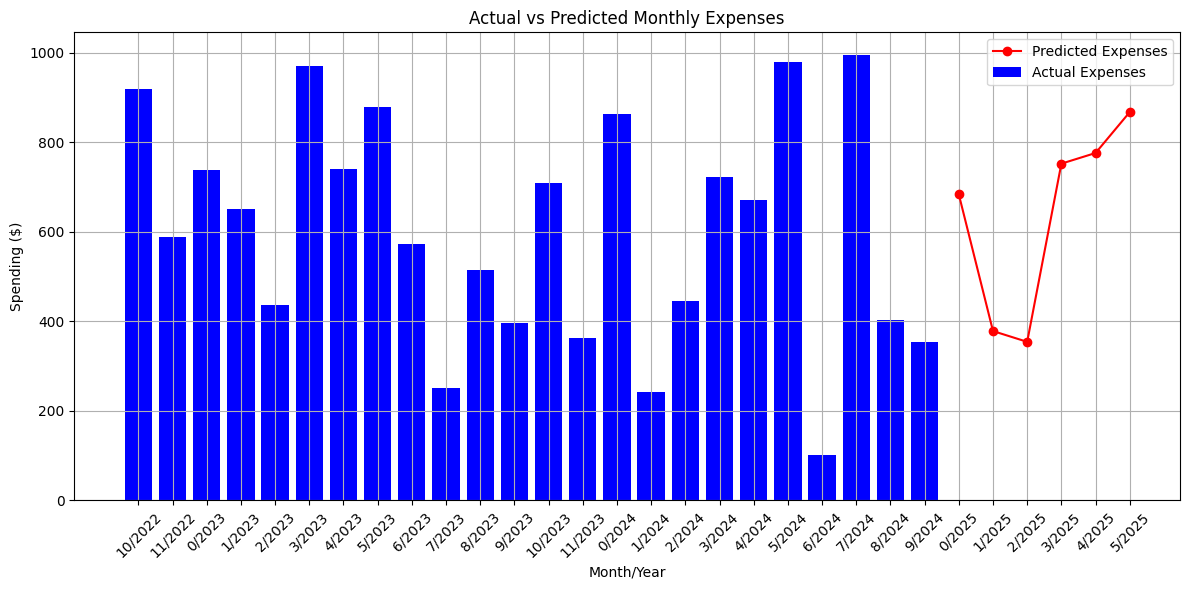

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Step 1: Generate Sample Transaction Data
def generate_sample_data(start_date, months_count):
    dates = [start_date + timedelta(days=30 * i) for i in range(months_count)]
    amounts = np.random.randint(100, 1000, size=months_count)  # Random values between $100 and $1000
    transactions_data = pd.DataFrame({'date': dates, 'amount': amounts})

    # Save data to CSV
    transactions_data.to_csv('sample_transactions.csv', index=False)
    print("Sample transaction data has been created and saved as 'sample_transactions.csv'.")

# Generate sample data for the past 24 months
generate_sample_data(datetime.now() - timedelta(days=30 * 24), 24)

# Step 2: Load Data and Forecast Future Spending
# Load the transaction data
data = pd.read_csv('sample_transactions.csv')

# Preprocess the data
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

# Group data by month and year to compute total expenses each month
monthly_expenses_data = data.groupby(['year', 'month'])['amount'].sum().reset_index()

# Prepare the feature set (X) and target (y)
# Convert month to categorical representation
monthly_expenses_data['month'] = monthly_expenses_data['month'].astype('category').cat.codes

X = monthly_expenses_data[['year', 'month']]
y = monthly_expenses_data['amount']

# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the Random Forest Regressor model
forecast_model = RandomForestRegressor(n_estimators=100, random_state=42)
forecast_model.fit(X_train, y_train)

# Predict future expenses for the next 6 months
future_data = pd.DataFrame({
    'year': [2025] * 6,  # Specifying the year for future months
    'month': list(range(1, 7))  # Forecast for the next 6 months
})
# Convert month to categorical for prediction
future_data['month'] = future_data['month'].astype('category').cat.codes

predicted_values = forecast_model.predict(future_data)

# Display predicted future expenses
for i, prediction in enumerate(predicted_values):
    print(f'Forecasted expense for {future_data.iloc[i]["month"] + 1}/2025: ${prediction:.2f}')  # Display with month adjustment

# Step 3: Data Visualization
plt.figure(figsize=(12, 6))

# Plot actual historical expenses
plt.bar(monthly_expenses_data['month'].astype(str) + '/' + monthly_expenses_data['year'].astype(str),
        monthly_expenses_data['amount'], label='Actual Expenses', color='blue')

# Plot predicted expenses
forecast_months = future_data['month'].astype(str) + '/2025'
plt.plot(forecast_months, predicted_values, marker='o', label='Predicted Expenses', color='red')

# Add labels, title, and grid
plt.title('Actual vs Predicted Monthly Expenses')
plt.xlabel('Month/Year')
plt.ylabel('Spending ($)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()


In [5]:
import numpy as np
import pandas as pd

# Example categorized expenses for a month (typically derived from transaction data)
expense_data = {
    'category': ['Dining', 'Groceries', 'Transportation', 'Utilities', 'Shopping', 'Dining'],
    'amount': [300, 400, 100, 200, 150, 50]  # Amount spent per category
}

# Create a DataFrame from the sample data
expenses_df = pd.DataFrame(expense_data)

# Function to generate personalized financial recommendations based on spending
def generate_financial_recommendations(expenses_df):
    recommendations = []
    total_spending = expenses_df['amount'].sum()

    # Summarize spending by category
    category_spending = expenses_df.groupby('category')['amount'].sum().sort_values(ascending=False)

    # Analyze spending patterns and give suggestions
    if total_spending > 1000:
        recommendations.append("Your total expenses are quite high this month. Consider reviewing your budget to cut costs.")

    if 'Dining' in category_spending.index and category_spending['Dining'] > 300:
        recommendations.append("You are spending a significant amount on Dining. Try to cook more at home instead of eating out.")

    if 'Groceries' in category_spending.index and category_spending['Groceries'] > 500:
        recommendations.append("Your grocery expenses seem high. Look for discounts or plan your meals to save money.")

    if 'Transportation' in category_spending.index and category_spending['Transportation'] > 200:
        recommendations.append("Consider alternatives like public transport or carpooling to reduce transportation costs.")

    if 'Utilities' in category_spending.index and category_spending['Utilities'] > 150:
        recommendations.append("Your utility bills appear to be high. Implement energy-saving practices to cut down costs.")

    if 'Shopping' in category_spending.index and category_spending['Shopping'] > 100:
        recommendations.append("You are spending quite a bit on shopping. Set a limit or avoid impulse purchases to save money.")

    return recommendations

# Generate and display personalized financial recommendations based on the data
financial_recommendations = generate_financial_recommendations(expenses_df)
print("Personalized Financial Recommendations:")
for recommendation in financial_recommendations:
    print(f'- {recommendation}')


Personalized Financial Recommendations:
- Your total expenses are quite high this month. Consider reviewing your budget to cut costs.
- You are spending a significant amount on Dining. Try to cook more at home instead of eating out.
- Your utility bills appear to be high. Implement energy-saving practices to cut down costs.
- You are spending quite a bit on shopping. Set a limit or avoid impulse purchases to save money.
